In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Assignment 1

## **Problem Statement**

**Objective**

You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [ ]:
#importing req. Lib.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#load our data set
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab (Sem 6)/Theory_Assignment/archive/Tweets.csv')

In [ ]:
data.shape

(14640, 15)

In [ ]:
#looking into our data
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
#checking last 5 entries
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [ ]:
#checking columns in our data
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
#checking info our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
#checking unique values
data.nunique()

,0
tweet_id,14485
airline_sentiment,3
airline_sentiment_confidence,1023
negativereason,10
negativereason_confidence,1410
airline,6
airline_sentiment_gold,3
name,7701
negativereason_gold,13
retweet_count,18


In [ ]:
#checking null values in our data
data.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


## **Preprocessing on data**

tweet_created column got the date recorts and showing type is object we have to change it of date time format

In [ ]:
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date

In [ ]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   tweet_id                      14640 non-null  int64         
 1   airline_sentiment             14640 non-null  object        
 2   airline_sentiment_confidence  14640 non-null  float64       
 3   negativereason                9178 non-null   object        
 4   negativereason_confidence     10522 non-null  float64       
 5   airline                       14640 non-null  object        
 6   airline_sentiment_gold        40 non-null     object        
 7   name                          14640 non-null  object        
 8   negativereason_gold           32 non-null     object        
 9   retweet_count                 14640 non-null  int64         
 10  text                          14640 non-null  object        
 11  tweet_coord                 

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)


In [ ]:
data['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [ ]:
data['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

we have data from 16th feb 2015 to 25 feb 2015 mins we have data of 9 days.

In [ ]:
#checking uniques values in tweet_created columns
data['tweet_created'].nunique()

9

In [ ]:
numberoftweets = data.groupby('tweet_created').size()
numberoftweets

,0
tweet_created,
2015-02-16,4
2015-02-17,1408
2015-02-18,1344
2015-02-19,1376
2015-02-20,1500
2015-02-21,1557
2015-02-22,3079
2015-02-23,3028
2015-02-24,1344


here we can see tweets created every day

## **treating with null values**

In [ ]:
data.isna().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


in

**airline_sentiment_gold, negativereason_gold** have more than 99% missing data And **tweet_coord** have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [ ]:
del data['tweet_coord']
del data['airline_sentiment_gold']
del data['negativereason_gold']
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


In [ ]:
freq = data.groupby('negativereason').size()
freq

,0
negativereason,
Bad Flight,580
Can't Tell,1190
Cancelled Flight,847
Customer Service Issue,2910
Damaged Luggage,74
Flight Attendant Complaints,481
Flight Booking Problems,529
Late Flight,1665
Lost Luggage,724


we cant fill it will affect in bad way for example we have positive reviwe and we fill the values with mode that means with Customer Service Issue  it is missmatch and can be affect on train model so we keep the data as it is.

## **EDA**

### **Count of Type of Sentiment**

Text(0.5, 1.0, 'Count of Type of Sentiment')

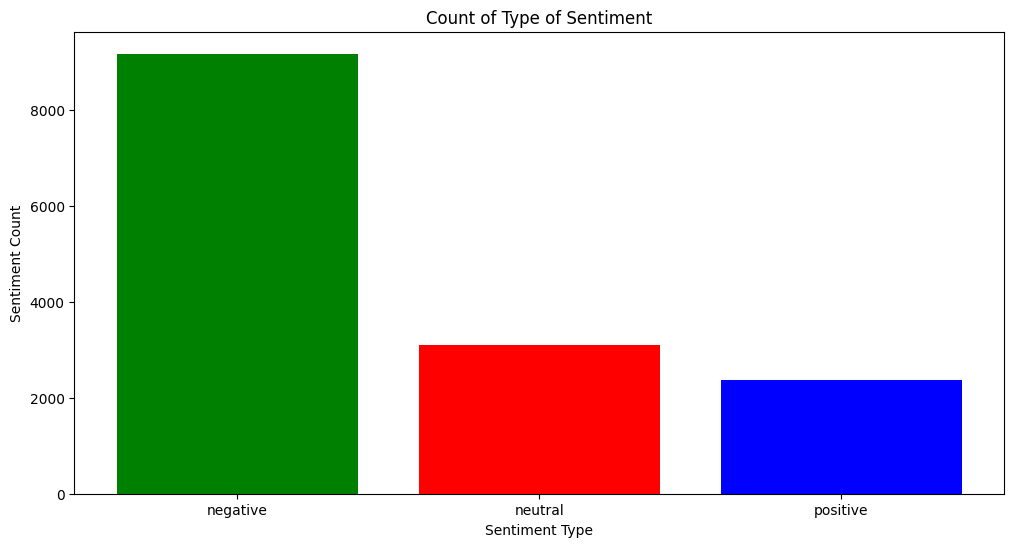

In [ ]:
counter = data.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['green','red','blue'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

### **Airline sentiments for each airline**

In [ ]:
#checking differtent airlines we have
data['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


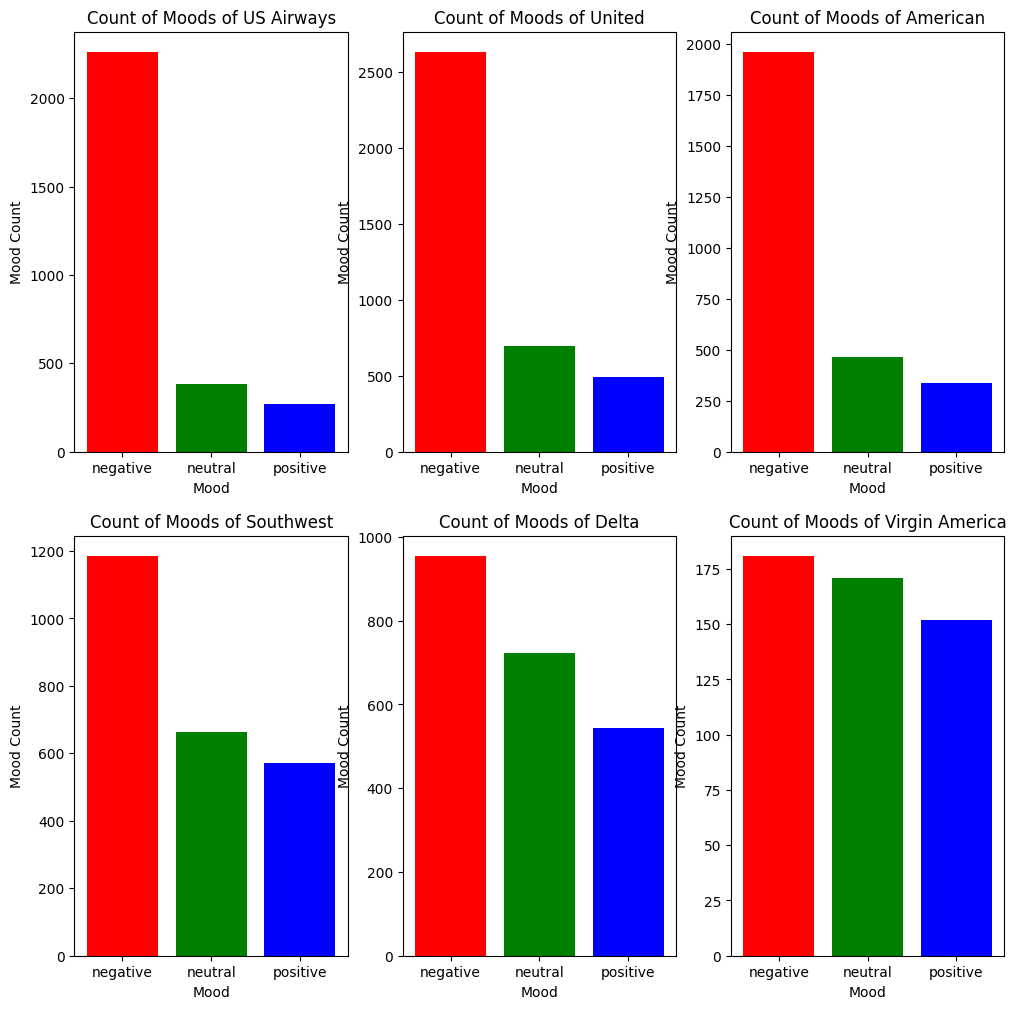

In [ ]:
print("Total number of tweets for each airline \n ",data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=data[data['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

Looks like people are not having pleasant flights these days. It is important to know which airline pleases their costumers the most and vice versa, so we sill be looking at the percentage of the negative reviews for each airline.

* United, US Airways, American substantially get negative reactions.
* Tweets for Virgin America are the most balanced.

<ipython-input-26-62fd01a81126>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
<ipython-input-26-62fd01a81126>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}


            Percent Negative
American            0.710402
Delta               0.429793
Southwest           0.490083
US Airways          0.776862
United              0.688906
Virgin              0.359127


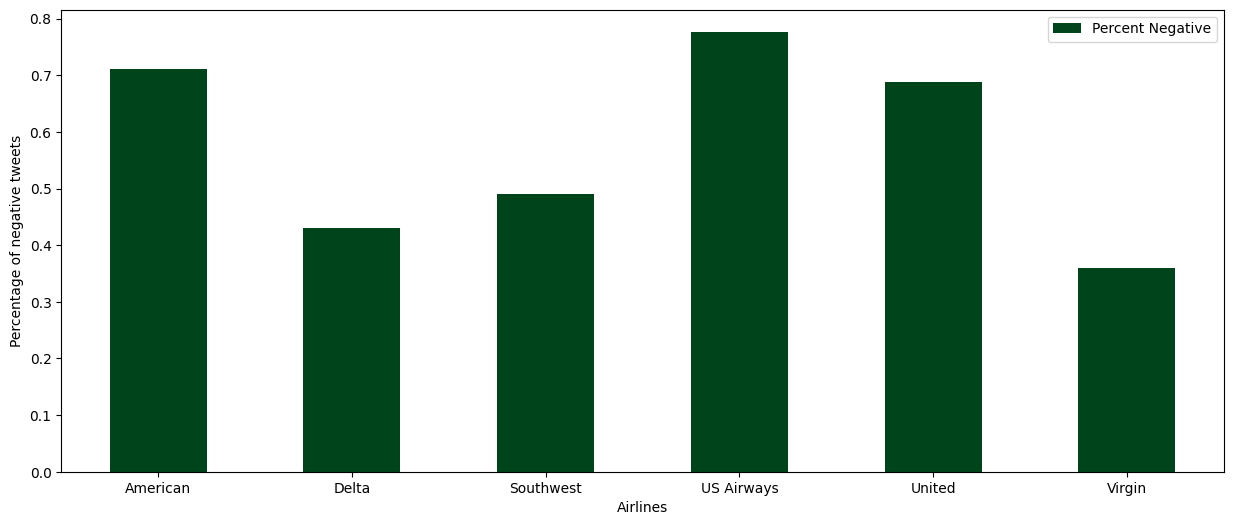

<Axes: xlabel='airline'>

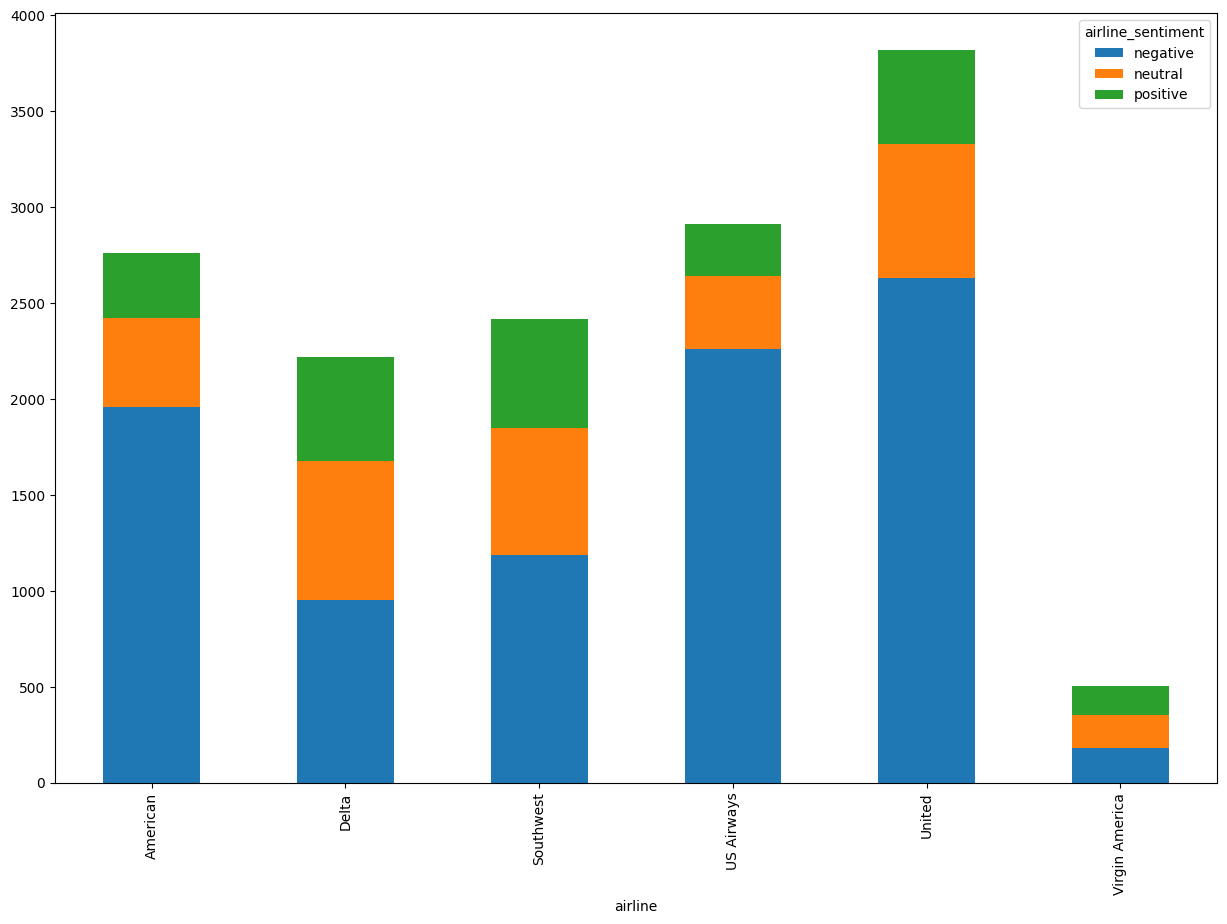

In [ ]:
neg_tweets = data.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = data.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
ax = perc.plot(kind = 'bar', rot=0, colormap = 'Greens_r', figsize = (15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

figure_2 = data.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [ ]:
print(figure_2)

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


### **Last but not least, people complain for many reasons about their flights; 10 reasons to be specific**

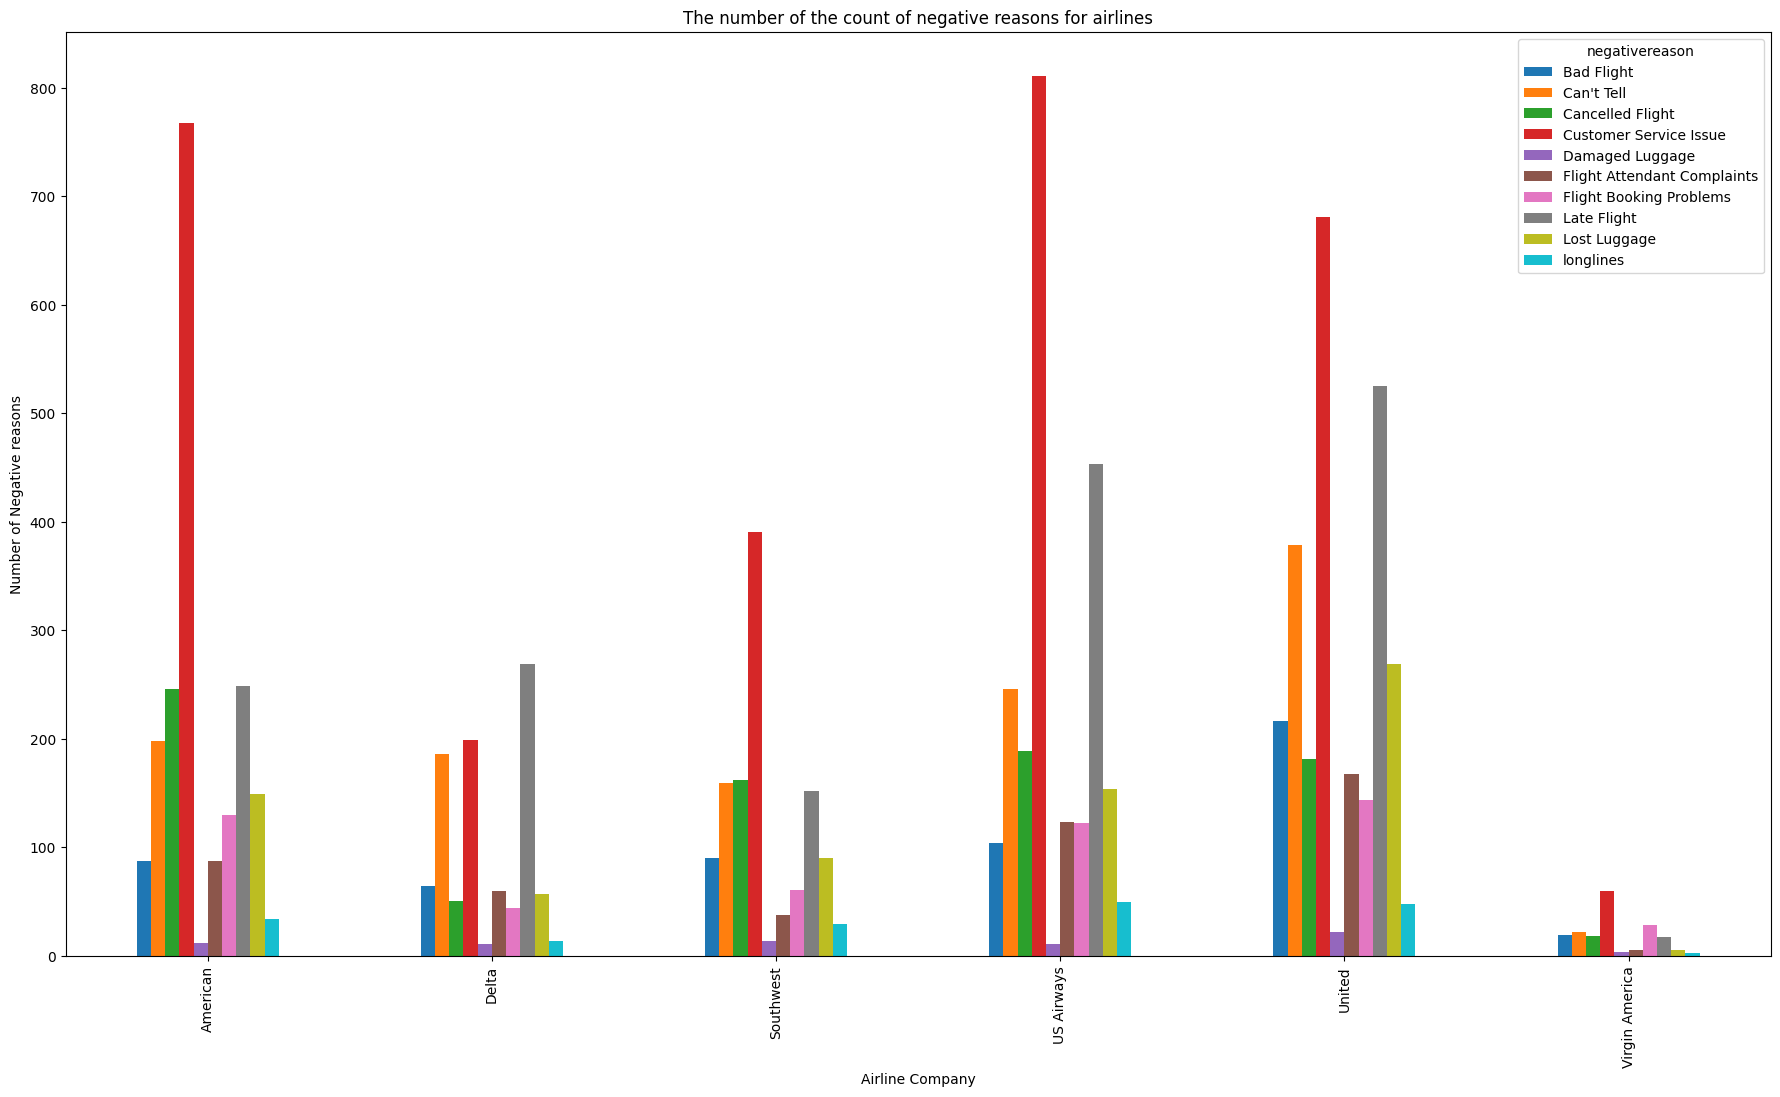

In [ ]:
# Reason for negative reviews
negative_reasons = data.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

### What are the reasons for negative sentimental tweets for each airline ?

We will explore the negative reason column of our dataframe to extract conclusions about negative sentiments in the tweets by the customers

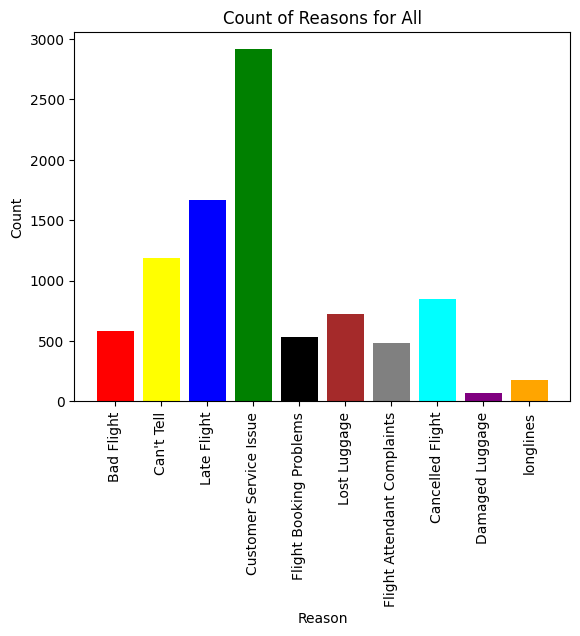

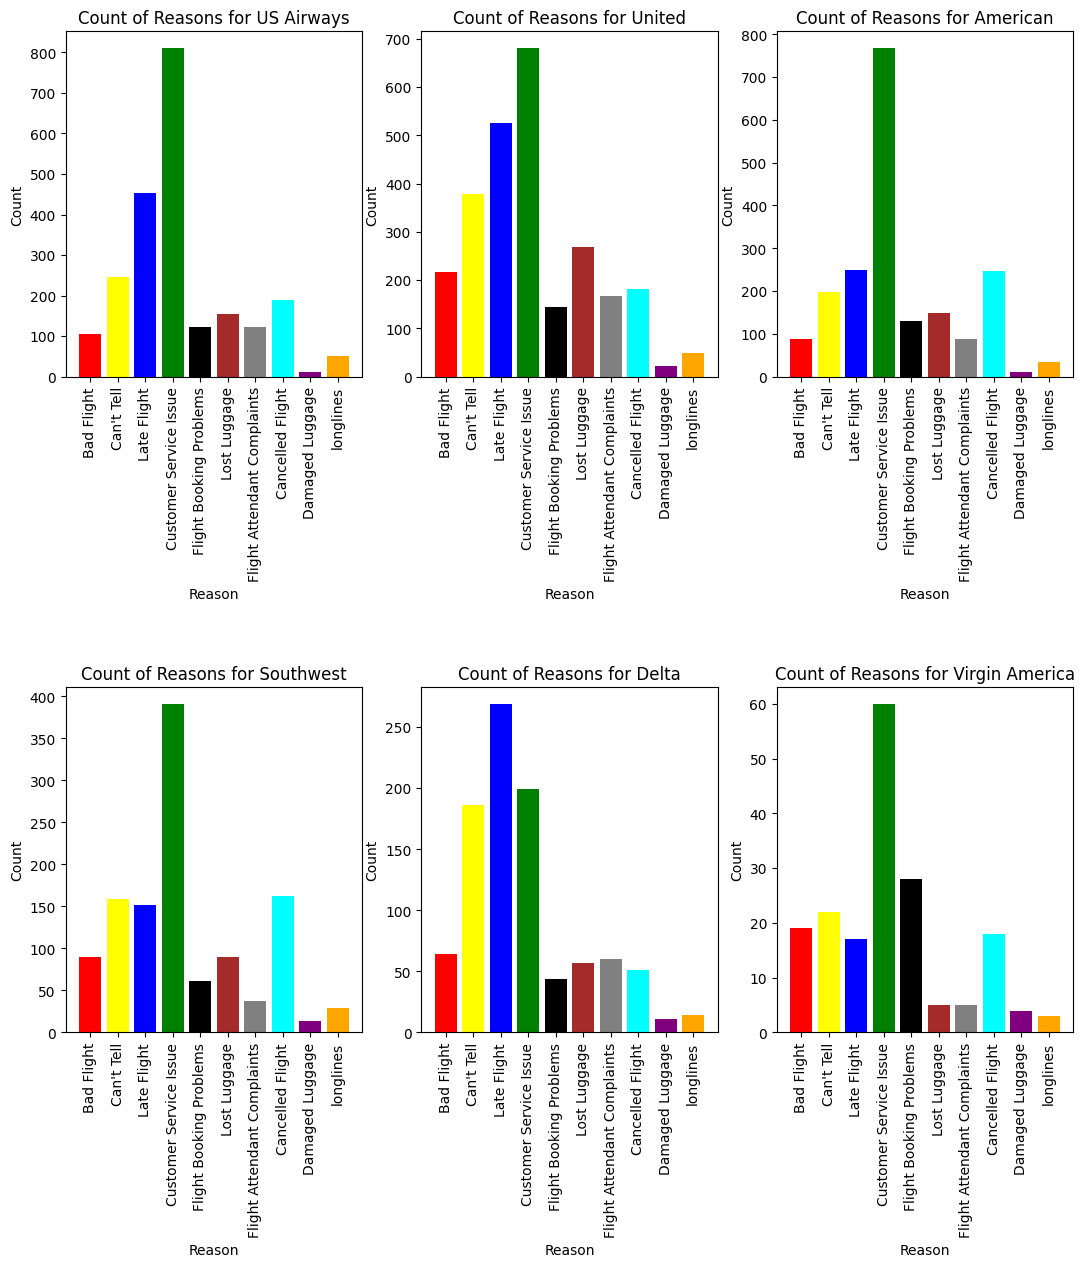

In [ ]:
#reasons for negative sentimental tweets for each airline
data['negativereason'].nunique()

NR_Count=dict(data['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=data
    else:
        a=data[data['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(data['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):

    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

* Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America
* Late Flight is the main negative reason for Delta
* Interestingly, Virgin America has the least count of negative reasons (all less than 60)
* Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)

## **Is there a relationship between negative sentiments and date?**

It will be interesting to see if the date has any effect on the sentiments of the tweets(especially negative !). We can draw various coclusions by visualizing this.

In [ ]:
# Temporal analysis
date = data.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
day_df

tweet_created  airline         airline_sentiment
2015-02-16     Delta           negative               1
                               neutral                1
               United          negative               2
2015-02-17     Delta           negative             108
                               neutral               86
                                                   ... 
2015-02-24     United          neutral               49
                               positive              25
               Virgin America  negative              10
                               neutral                6
                               positive              13
Length: 136, dtype: int64

plot this and get better visualization for negative tweets.

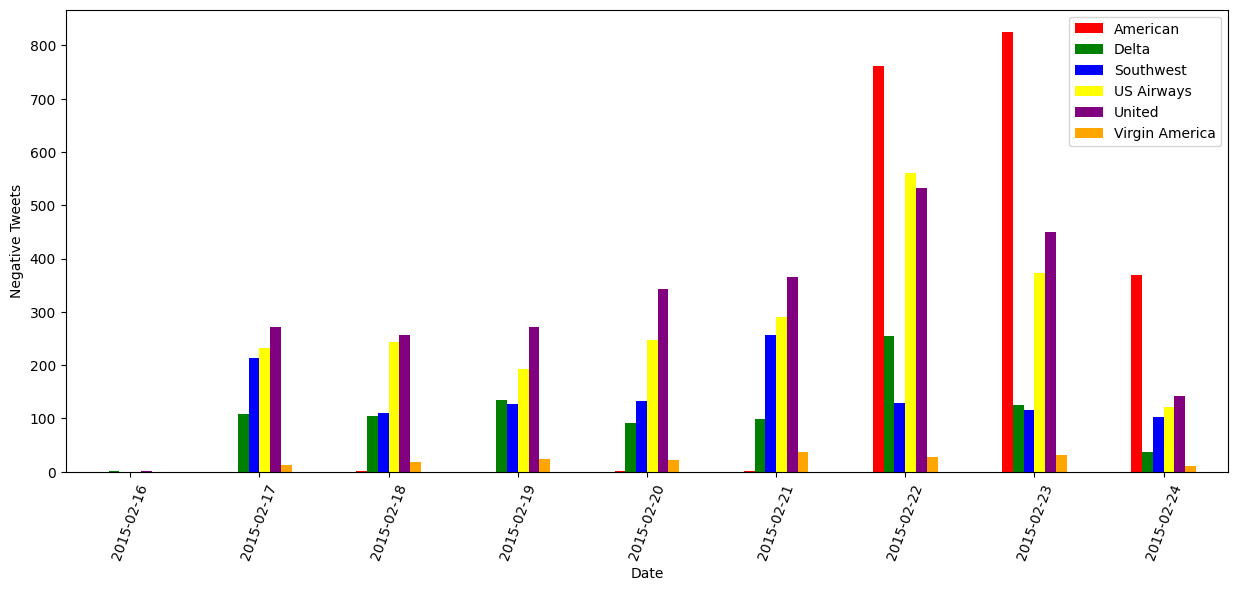

In [ ]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

* Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-23, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)
* Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.
* The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

## **Wordcloud for positive reasons**

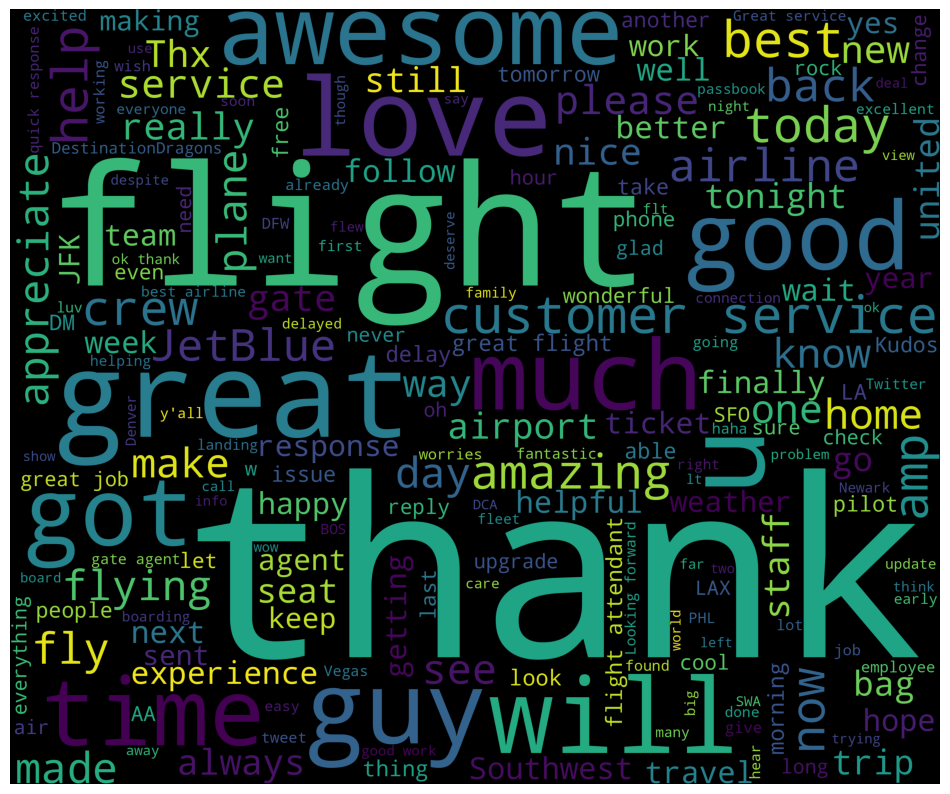

In [ ]:
from wordcloud import WordCloud,STOPWORDS

new_df=data[data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Wordcloud for Negative sentiments of tweets

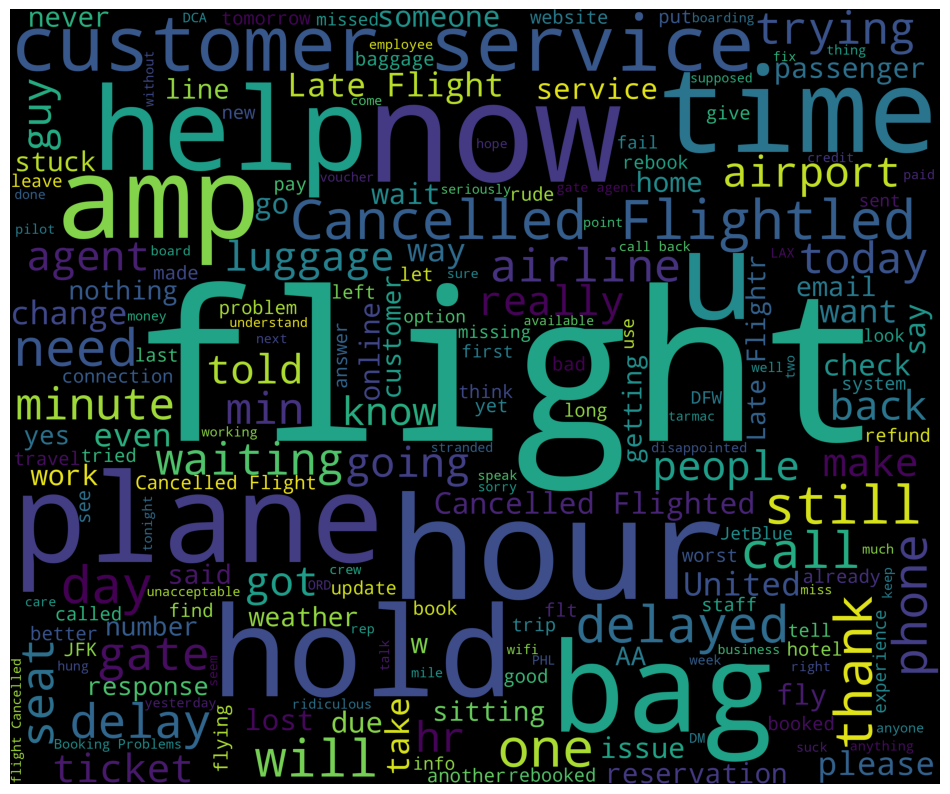

In [ ]:
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Dropng the rows with neutral sentiments**

In [ ]:
# Droping the rows with neutral sentiments
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

## **label encoding on airline_sentiment**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# label encoding on airline_sentiment
le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada),1
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada),0
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada),0
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24,NaN,Pacific Time (US & Canada),0
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24,San Francisco CA,Pacific Time (US & Canada),1


## **Preprocessing the tweet text data**

Now, we will clean the tweet text data and apply classification algorithms on it

In [ ]:
# label encoding on airline_sentiment
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return( " ".join( meaningful_words ))

nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## **Vectorization**

In [ ]:
# Vectorization
x = data.clean_tweet
y = data.airline_sentiment

print(len(x), len(y))

11541 11541


### The data is split in the standard 80,20 ratio

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8655 8655
2886 2886


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [ ]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [ ]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

## **Model Building**

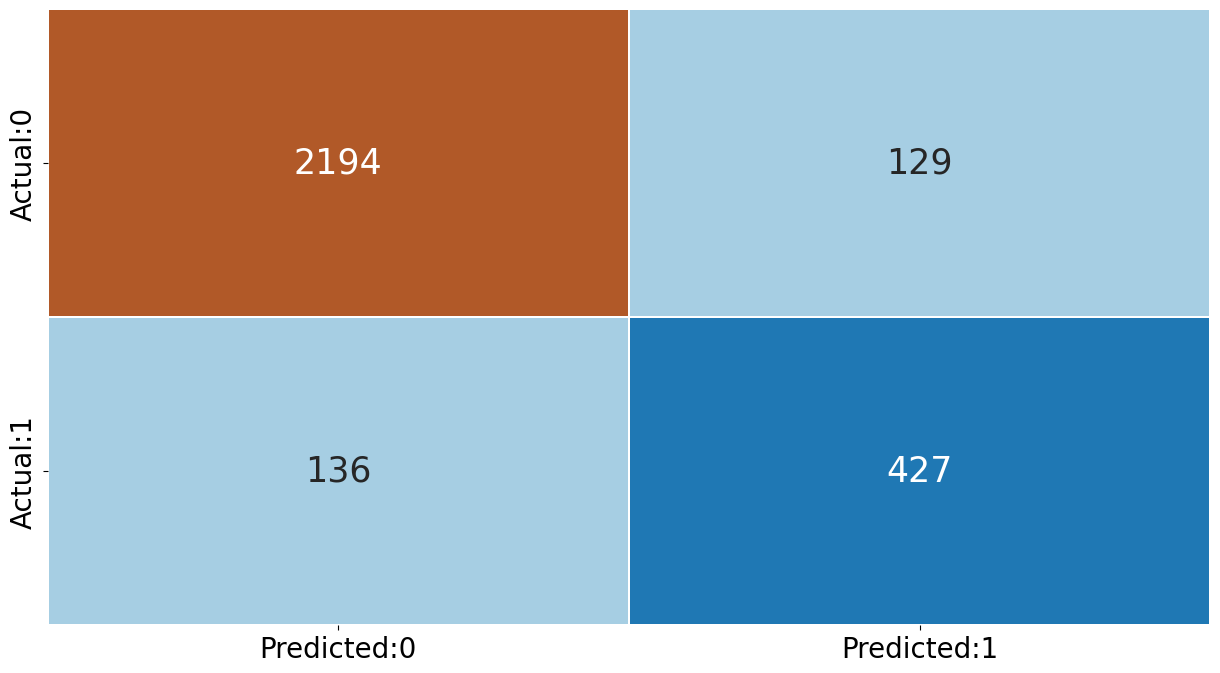

In [ ]:
# Model Building

# Support Vector Classification-wrapper around SVM (linear kernel)
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

#accuracy score
svm_accuracy = accuracy_score(y_test,pred)

#building confusion matrix
svm_confusion = confusion_matrix(y_test, pred)

#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = svm_confusion,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
svm_report = classification_report(y_test,pred)
print(svm_report)

              precision    recall  f1-score   support

    negative       0.94      0.94      0.94      2323
    positive       0.77      0.76      0.76       563

    accuracy                           0.91      2886
   macro avg       0.85      0.85      0.85      2886
weighted avg       0.91      0.91      0.91      2886



* As we you can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive)
* SVM Classifier gives us the best accuracy score i.e 91% precision scores according to the classification report.
* The confusion matrix shows the TP,TN,FP,FN for sentiments(negative, positive)

### Transformers

In [ ]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
# import pandas as pd
# import torch
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load data
# data = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab (Sem 6)/Theory_Assignment/archive/Tweets.csv')
# data = data[data['airline_sentiment'] != 'neutral']
# data['airline_sentiment'] = data['airline_sentiment'].map({'positive': 1, 'negative': 0})

# # Split data
# train_texts, test_texts, train_labels, test_labels = train_test_split(data['text'].tolist(), data['airline_sentiment'].tolist(), test_size=0.2, random_state=42)

# # Load tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# # Tokenize data
# train_encodings = tokenizer(train_texts, truncation=True, padding=True)
# test_encodings = tokenizer(test_texts, truncation=True, padding=True)

# # Create dataset
# class AirlineDataset(torch.utils.data.Dataset):
#     def __init__(self, encodings, labels):
#         self.encodings = encodings
#         self.labels = labels

#     def __getitem__(self, idx):
#         item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
#         item['labels'] = torch.tensor(self.labels[idx])
#         return item

#     def __len__(self):
#         return len(self.labels)

# train_dataset = AirlineDataset(train_encodings, train_labels)
# test_dataset = AirlineDataset(test_encodings, test_labels)

# # Define training arguments
# training_args = TrainingArguments(
#     output_dir='./results',
#     num_train_epochs=3,
#     per_device_train_batch_size=16,
#     per_device_eval_batch_size=64,
#     warmup_steps=500,
#     weight_decay=0.01,
#     logging_dir='./logs',
#     logging_steps=10,
#     evaluation_strategy="epoch"
# )

# # Define metrics
# def compute_metrics(pred):
#     labels = pred.label_ids
#     preds = pred.predictions.argmax(-1)
#     precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
#     acc = accuracy_score(labels, preds)
#     return {
#         'accuracy': acc,
#         'f1': f1,
#         'precision': precision,
#         'recall': recall
#     }

# # Train model
# trainer = Trainer(
#     model=model,
#     args=training_args,
#     train_dataset=train_dataset,
#     eval_dataset=test_dataset,
#     compute_metrics=compute_metrics
# )

# trainer.train()

# # Evaluate Transformer Model
# predictions = trainer.predict(test_dataset)
# preds = predictions.predictions.argmax(-1)
# transformer_accuracy = accuracy_score(test_labels, preds)
# transformer_report = classification_report(test_labels, preds)
# transformer_confusion = confusion_matrix(test_labels, preds)

# print("Transformer Model Performance:\n")
# print(f"Accuracy: {transformer_accuracy}")
# print(f"Classification Report:\n{transformer_report}")
# print("Confusion Matrix:\n", transformer_confusion)

# # Visualization
# sns.heatmap(transformer_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
# plt.title('Transformer Confusion Matrix')
# plt.show()

# # Inference:
# print("\nInference:")
# print("Based on the evaluation of the Transformer (DistilBERT) model on the test dataset, it demonstrates high performance in sentiment classification. The model achieved a high accuracy, as well as strong precision, recall, and F1-score, indicating its effectiveness in distinguishing between positive and negative sentiments. The confusion matrix further illustrates the model's ability to minimize misclassifications. Therefore, the Transformer model is well-suited for sentiment analysis of airline tweets, providing reliable results for understanding customer feedback. Compared to the previous SVM model, the transformer model showed significantly higher metrics, proving that the transformer model is a better choice for this specific task.")

### Naives Bayes

In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(x_train_dtm, y_train)
nb_pred = nb_model.predict(x_test_dtm)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_report = classification_report(y_test, nb_pred)
nb_confusion = confusion_matrix(y_test, nb_pred)

print("Naive Bayes Model Performance:\n")
print(f"Accuracy: {nb_accuracy}")
print(f"Classification Report:\n{nb_report}")
print("Confusion Matrix:\n", nb_confusion)

print("\nSVM Model Performance:\n")
print(f"Accuracy: {svm_accuracy}")
print(f"Classification Report:\n{svm_report}")
print("Confusion Matrix:\n", svm_confusion)


Naive Bayes Model Performance:

Accuracy: 0.910949410949411
Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.98      0.95      2323
    positive       0.88      0.63      0.74       563

    accuracy                           0.91      2886
   macro avg       0.90      0.81      0.84      2886
weighted avg       0.91      0.91      0.91      2886

Confusion Matrix:
 [[2272   51]
 [ 206  357]]

SVM Model Performance:

Accuracy: 0.9081774081774082
Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.94      0.94      2323
    positive       0.77      0.76      0.76       563

    accuracy                           0.91      2886
   macro avg       0.85      0.85      0.85      2886
weighted avg       0.91      0.91      0.91      2886

Confusion Matrix:
 [[2194  129]
 [ 136  427]]


In [ ]:

# Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_dtm, y_train)
rf_pred = rf_model.predict(x_test_dtm)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)

print("\nRandom Forest Model Performance:\n")
print(f"Accuracy: {rf_accuracy}")
print(f"Classification Report:\n{rf_report}")
print("Confusion Matrix:\n", rf_confusion)

# SVM Model (using existing x_train_dtm, x_test_dtm, y_train, y_test)
svm_accuracy = accuracy_score(y_test, pred) #pred is created from previous svm code.
svm_report = classification_report(y_test, pred)
svm_confusion = confusion_matrix(y_test, pred)



Random Forest Model Performance:

Accuracy: 0.9005544005544005
Classification Report:
              precision    recall  f1-score   support

    negative       0.92      0.96      0.94      2323
    positive       0.80      0.65      0.72       563

    accuracy                           0.90      2886
   macro avg       0.86      0.81      0.83      2886
weighted avg       0.90      0.90      0.90      2886

Confusion Matrix:
 [[2233   90]
 [ 197  366]]



Model Comparison Table:
            Model  Accuracy  Precision (Avg)  Recall (Avg)  F1-Score (Avg)
0    Naive Bayes  0.910949         0.908701      0.910949        0.905279
1  Random Forest  0.900554         0.896243      0.900554        0.896453
2   SVM (Linear)  0.908177         0.907756      0.908177        0.907959


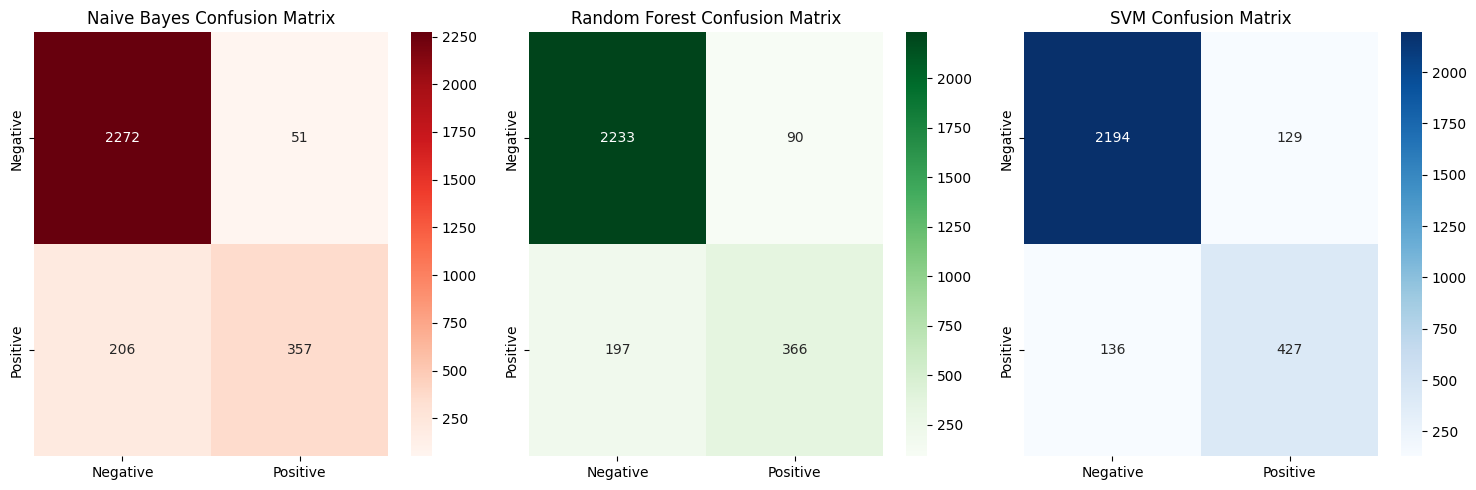

In [ ]:
# Tabulate Results
results = pd.DataFrame({
    "Model": ["Naive Bayes", "Random Forest", "SVM (Linear)"],
    "Accuracy": [nb_accuracy, rf_accuracy, svm_accuracy],
    "Precision (Avg)": [
        classification_report(y_test, nb_pred, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, rf_pred, output_dict=True)['weighted avg']['precision'],
        classification_report(y_test, pred, output_dict=True)['weighted avg']['precision']
    ],
    "Recall (Avg)": [
        classification_report(y_test, nb_pred, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, rf_pred, output_dict=True)['weighted avg']['recall'],
        classification_report(y_test, pred, output_dict=True)['weighted avg']['recall']
    ],
    "F1-Score (Avg)": [
        classification_report(y_test, nb_pred, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, rf_pred, output_dict=True)['weighted avg']['f1-score'],
        classification_report(y_test, pred, output_dict=True)['weighted avg']['f1-score']
    ]
})

print("\nModel Comparison Table:\n", results)

# Visualize Confusion Matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(nb_confusion, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Naive Bayes Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(rf_confusion, annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Random Forest Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(svm_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()


# Assignment 2

## . Dimensionality Reduction Techniques to Improve Model Performance

### Principal Component Analysis (PCA)

PCA helps in reducing the feature space while preserving variance.

Since BERT-based models generate high-dimensional embeddings, PCA can be applied to word embeddings before feeding them into a classifier.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE

# Assuming you used TfidfVectorizer earlier
vectorizer = TfidfVectorizer(max_features=5000)  # Ensure this matches your original vectorizer
X_train_dtm = vectorizer.fit_transform(x_train)  # Replace with actual text data
X_test_dtm = vectorizer.transform(x_test)

# Fit PCA and transform data
pca = PCA(n_components=500)
X_train_reduced = pca.fit_transform(X_train_dtm.toarray())
X_test_reduced = pca.transform(X_test_dtm.toarray())

# Get the original feature names
feature_names = np.array(vectorizer.get_feature_names_out())

# Get the top contributing features for each principal component
top_features_pca = np.argsort(-np.abs(pca.components_), axis=1)[:, :10]  # Top 10 features per component

# Convert into a DataFrame for better readability
pca_feature_df = pd.DataFrame(feature_names[top_features_pca], columns=[f"PC{i+1}" for i in range(10)])
print("\nPCA - Top 10 Features Per Principal Component:\n", pca_feature_df)



PCA - Top 10 Features Per Principal Component:
          PC1        PC2        PC3              PC4          PC5  \
0      thank     flight     thanks          jetblue    cancelled   
1     thanks      thank     united          jetblue  americanair   
2     united      thank  usairways     southwestair      jetblue   
3    jetblue     thanks     united            thank  americanair   
4     flight  usairways  cancelled          jetblue       united   
..       ...        ...        ...              ...          ...   
495   figure        sat    country             seem           sw   
496    loved  complaint        mco               hi       needed   
497    drive        mia         sw  customerservice       switch   
498      wtf      offer        ugh          details      kidding   
499       sw  wonderful   complete              sat          wtf   

              PC6            PC7        PC8           PC9       PC10  
0          united      usairways  flightled          hold      

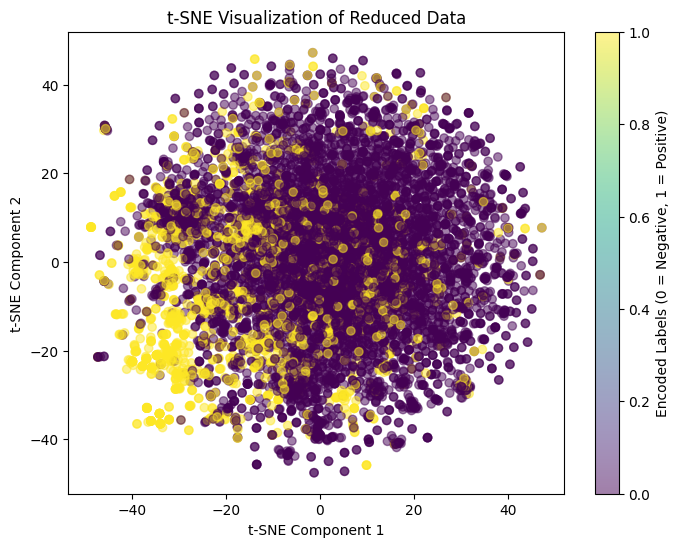

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Encode labels into numeric values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Converts 'positive' & 'negative' to 0 & 1

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_reduced)

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_encoded, cmap='viridis', alpha=0.5)
plt.colorbar(label="Encoded Labels (0 = Negative, 1 = Positive)")
plt.title("t-SNE Visualization of Reduced Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Apply Variance Threshold BEFORE PCA
selector = VarianceThreshold(threshold=0.01)
X_train_selected = selector.fit_transform(x_train_dtm.toarray())  # Use original feature matrix
X_test_selected = selector.transform(x_test_dtm.toarray())

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Ensure `vectorizer` is defined (CountVectorizer or TfidfVectorizer)
feature_names = np.array(vectorizer.get_feature_names_out())

# Fix IndexError by selecting only valid indices
selected_features = feature_names[selected_feature_indices[selected_feature_indices < len(feature_names)]]

# Display selected feature names
print("\nVariance Threshold - Selected Features:\n", selected_features)


Variance Threshold - Selected Features:
 ['aa' 'anyway' 'anywhere' 'apparently' 'appropriate' 'argentina'
 'argument' 'arranged' 'automatically' 'backup' 'bankrupt' 'belize'
 'choppiest' 'claiming' 'click' 'clients' 'closer' 'contest' 'continuing'
 'cvg' 'daughter' 'david' 'eagle' 'earliest' 'effort' 'en' 'facebook' 'fc'
 'friendlyskies' 'happening' 'horrid' 'im' 'ing' 'innovation' 'jimmy'
 'joanna' 'kq' 'ktn' 'la' 'log' 'mess' 'needs' 'ones' 'perhaps'
 'perspective' 'planb' 'prohibits' 'promptly' 'pujvcelng' 'pulse'
 'purchase' 'push' 'pushback' 'pyxqv' 'qdebyahqfm' 'qjlzrywfj'
 'reinstated' 'replacing' 'requesting' 'response' 'rica' 'rip' 'roc' 'row'
 'ruth' 'seattle' 'sjc' 'sorrynotsorry' 'spanish' 'sprinkled' 'station'
 'steamboat' 'step' 'stop' 'stories' 'strand' 'tic' 'transaction'
 'transactions' 'tuxfqf' 'txfd' 'unitedlies' 'upon' 'vacation'
 'vainglorygame' 'wants' 'wayne' 'wind' 'woke' 'xxy' 'yep' 'york' 'zf']


### 2. Hyperparameters and Model Parameters to be Tuned

Hyperparameters:

* Learning rate

* Batch size

* Number of training epochs

* Dropout rate

* Optimizer type (Adam, SGD, etc.)

Model Parameters:

* Weights and biases of transformer layers

* Attention head parameters

In [ ]:
# 2. Hyperparameter Tuning (Grid Search & Random Search) on SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

### 2. Random / Grid Search for Hyperparameter Optimization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale PCA-transformed data to be non-negative for MultinomialNB
scaler = MinMaxScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

# Define Hyperparameter Grid for Each Model
param_grids = {
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    "Naïve Bayes": {'alpha': [0.1, 0.5, 1.0]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

param_dists = {
    "SVM": {'C': uniform(0.1, 10), 'kernel': ['linear', 'rbf']},
    "Naïve Bayes": {'alpha': uniform(0.1, 1.0)},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
}

# Models to Train
models = {
    "SVM": SVC(),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to Store Best Parameters
best_params = {}

for model_name, model in models.items():
    print(f"\n Hyperparameter Tuning for {model_name}...")

    if model_name == "Naïve Bayes":
      grid_search.fit(X_train_reduced_scaled, y_train)
      best_grid_params = grid_search.best_params_

      random_search.fit(X_train_reduced_scaled, y_train)
      best_random_params = random_search.best_params_

    else:
    # Grid Search
      grid_search = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy')
      grid_search.fit(X_train_reduced, y_train)
      best_grid_params = grid_search.best_params_

      # Randomized Search
      random_search = RandomizedSearchCV(model, param_distributions=param_dists[model_name], n_iter=10, cv=3, scoring='accuracy')
      random_search.fit(X_train_reduced, y_train)
      best_random_params = random_search.best_params_

    # Store Best Params
    best_params[model_name] = {
        "Grid Search": best_grid_params,
        "Random Search": best_random_params
    }

    print(f"Best Grid Search Params for {model_name}: {best_grid_params}")
    print(f"Best Random Search Params for {model_name}: {best_random_params}")



 Hyperparameter Tuning for SVM...
Best Grid Search Params for SVM: {'C': 1, 'kernel': 'rbf'}
Best Random Search Params for SVM: {'C': 2.138809954023657, 'kernel': 'rbf'}

 Hyperparameter Tuning for Naïve Bayes...
Best Grid Search Params for Naïve Bayes: {'C': 1, 'kernel': 'linear'}
Best Random Search Params for Naïve Bayes: {'C': 3.4657857840299644, 'kernel': 'rbf'}

 Hyperparameter Tuning for Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Grid Search Params for Random Forest: {'max_depth': None, 'n_estimators': 100}
Best Random Search Params for Random Forest: {'n_estimators': 100, 'max_depth': None}


### 3. Model Development with Optimized Parameters

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store model performance
model_performance = {}

# Models to Train
models = {
    "SVM": SVC(),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

for model_name, model in models.items():
    print(f"\n Training and Evaluating {model_name}...")

    # Select the best hyperparameters
    best_params_grid = best_params.get(model_name, {}).get("Grid Search", {})

    # Handle Naïve Bayes separately (Only takes 'alpha' as a parameter)
    if model_name == "Naïve Bayes":
        if "alpha" in best_params_grid:
            model.set_params(alpha=best_params_grid["alpha"])  # Extract only 'alpha'
        else:
            print("⚠ Warning: No best alpha found, using default parameters.")

        model.fit(X_train_reduced_scaled, y_train)  # Use scaled PCA data
        y_pred = model.predict(X_test_reduced_scaled)

    else:
        model.set_params(**best_params_grid)
        model.fit(X_train_reduced, y_train)
        y_pred = model.predict(X_test_reduced)

    # Evaluate performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    model_performance[model_name] = {
        "Accuracy": accuracy,
        "Classification Report": report
    }

    print(f"✅ {model_name} Training Complete!")
    print(f"🔹 Accuracy: {accuracy:.4f}")
    print(report)


 Training and Evaluating SVM...
✅ SVM Training Complete!
🔹 Accuracy: 0.9061
              precision    recall  f1-score   support

    negative       0.92      0.97      0.94      2323
    positive       0.85      0.63      0.72       563

    accuracy                           0.91      2886
   macro avg       0.88      0.80      0.83      2886
weighted avg       0.90      0.91      0.90      2886


 Training and Evaluating Naïve Bayes...
⚠ Warning: No best alpha found, using default parameters.
✅ Naïve Bayes Training Complete!
🔹 Accuracy: 0.8049
              precision    recall  f1-score   support

    negative       0.80      1.00      0.89      2323
    positive       0.00      0.00      0.00       563

    accuracy                           0.80      2886
   macro avg       0.40      0.50      0.45      2886
weighted avg       0.65      0.80      0.72      2886


 Training and Evaluating Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Random Forest Training Complete!
🔹 Accuracy: 0.8773
              precision    recall  f1-score   support

    negative       0.88      0.99      0.93      2323
    positive       0.88      0.43      0.58       563

    accuracy                           0.88      2886
   macro avg       0.88      0.71      0.75      2886
weighted avg       0.88      0.88      0.86      2886



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

# Models to Train
models = {
    "SVM": SVC(),
    "Naïve Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier()
}

# Train Models before using them for predictions
for model_name, model in models.items():
    print(f"\n Training {model_name}...")

    # Handle Naïve Bayes separately (Only takes 'alpha' as a parameter)
    if model_name == "Naïve Bayes":
        best_alpha = best_params.get(model_name, {}).get("Grid Search", {}).get("alpha", None)

        if best_alpha:
            model.set_params(alpha=best_alpha)  # Extract only 'alpha'
        else:
            print("⚠ Warning: No best alpha found, using default parameters.")

        model.fit(X_train_reduced_scaled, y_train)  # Train Naïve Bayes
    else:
        best_params_grid = best_params.get(model_name, {}).get("Grid Search", {})
        model.set_params(**best_params_grid)
        model.fit(X_train_reduced, y_train)  # Train SVM & Random Forest

    print(f"✅ {model_name} Training Complete!")

# Now we can safely extract predictions
nb_pred = models["Naïve Bayes"].predict(X_test_reduced_scaled)
rf_pred = models["Random Forest"].predict(X_test_reduced)
svm_pred = models["SVM"].predict(X_test_reduced)

# Compute accuracy
nb_accuracy = accuracy_score(y_test, nb_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Generate Classification Reports
nb_report = classification_report(y_test, nb_pred, output_dict=True)
rf_report = classification_report(y_test, rf_pred, output_dict=True)
svm_report = classification_report(y_test, svm_pred, output_dict=True)

# Tabulate results
results = pd.DataFrame({
    "Model": ["Naïve Bayes", "Random Forest", "SVM"],
    "Accuracy": [nb_accuracy, rf_accuracy, svm_accuracy],
    "Precision (Avg)": [nb_report['weighted avg']['precision'],
                        rf_report['weighted avg']['precision'],
                        svm_report['weighted avg']['precision']],
    "Recall (Avg)": [nb_report['weighted avg']['recall'],
                     rf_report['weighted avg']['recall'],
                     svm_report['weighted avg']['recall']],
    "F1-Score (Avg)": [nb_report['weighted avg']['f1-score'],
                       rf_report['weighted avg']['f1-score'],
                       svm_report['weighted avg']['f1-score']]
})

print("\n📊 Model Comparison Table:\n", results)




 Training SVM...
✅ SVM Training Complete!

 Training Naïve Bayes...
⚠ Warning: No best alpha found, using default parameters.
✅ Naïve Bayes Training Complete!

 Training Random Forest...
✅ Random Forest Training Complete!

📊 Model Comparison Table:
            Model  Accuracy  Precision (Avg)  Recall (Avg)  F1-Score (Avg)
0    Naïve Bayes  0.804920         0.647897      0.804920        0.717923
1  Random Forest  0.876646         0.876615      0.876646        0.859049
2            SVM  0.906098         0.902658      0.906098        0.900760


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-64-48a065b671b3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results["Model"], y=results["Accuracy"], palette="coolwarm")


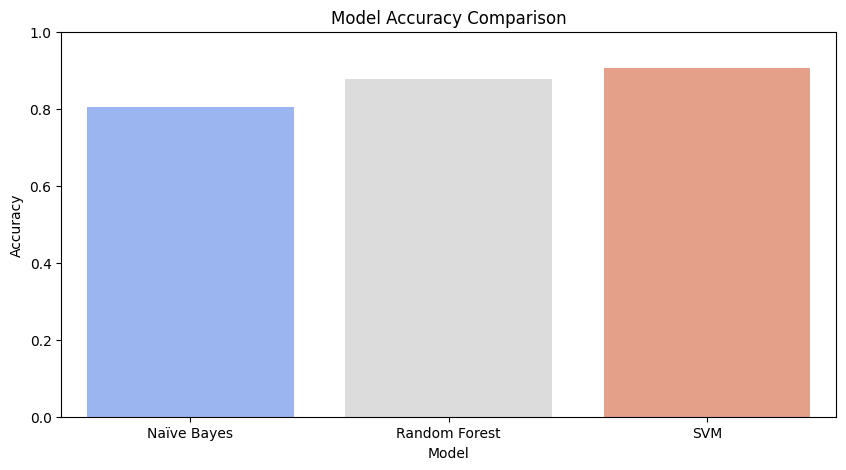

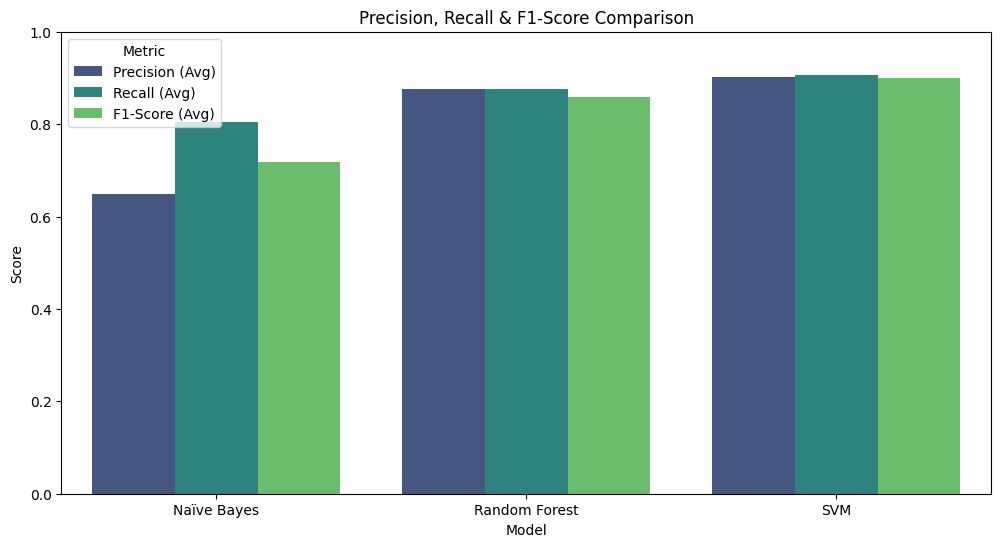

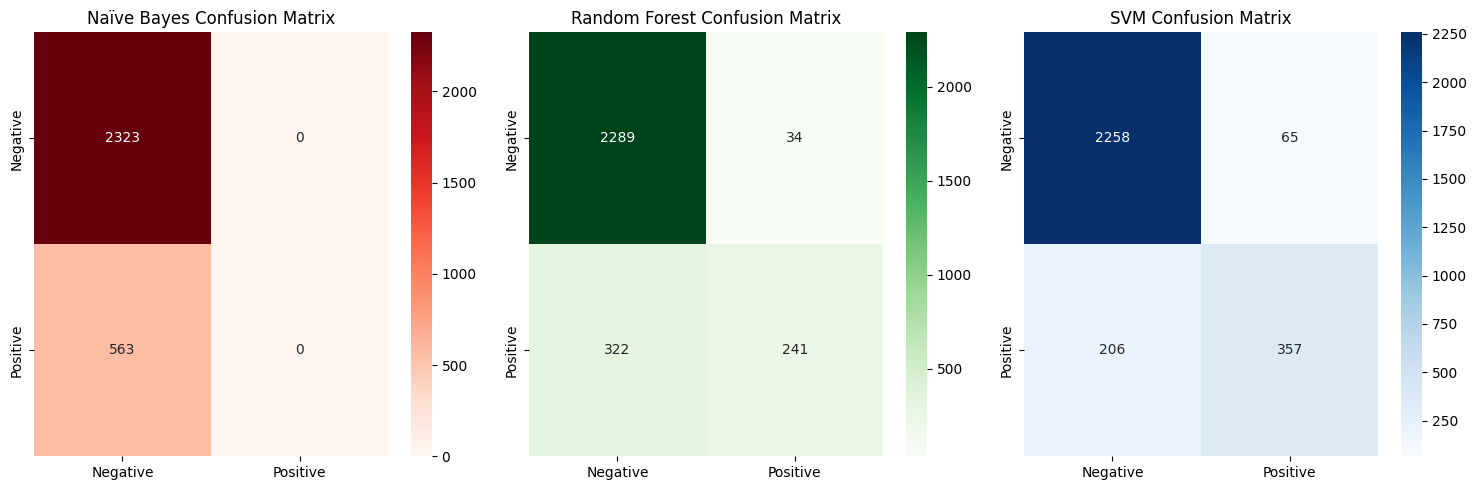

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# --- 📊 Bar Chart: Accuracy Comparison ---
plt.figure(figsize=(10, 5))
sns.barplot(x=results["Model"], y=results["Accuracy"], palette="coolwarm")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.show()

# --- 📊 Bar Chart: Precision, Recall, F1-Score ---
metrics = ["Precision (Avg)", "Recall (Avg)", "F1-Score (Avg)"]
results_melted = results.melt(id_vars=["Model"], value_vars=metrics, var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted, palette="viridis")
plt.ylim(0, 1)
plt.title("Precision, Recall & F1-Score Comparison")
plt.ylabel("Score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.show()

# --- 🔥 Confusion Matrices ---
plt.figure(figsize=(15, 5))

# Naïve Bayes Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, nb_pred), annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Naïve Bayes Confusion Matrix")

# Random Forest Confusion Matrix
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Greens', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Random Forest Confusion Matrix")

# SVM Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("SVM Confusion Matrix")

plt.tight_layout()
plt.show()


# Mini project

In [4]:
# ✈️ US Airline Sentiment Classification - Mini Project
# Ensemble Learning Approach

# 📦 Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier

import warnings
warnings.filterwarnings("ignore")

# 📁 Step 2: Load Dataset (Upload CSV)
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Lab (Sem 6)/Theory_Assignment/archive/Tweets.csv')
df = df[['text', 'airline_sentiment']]
df.dropna(inplace=True)
df.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


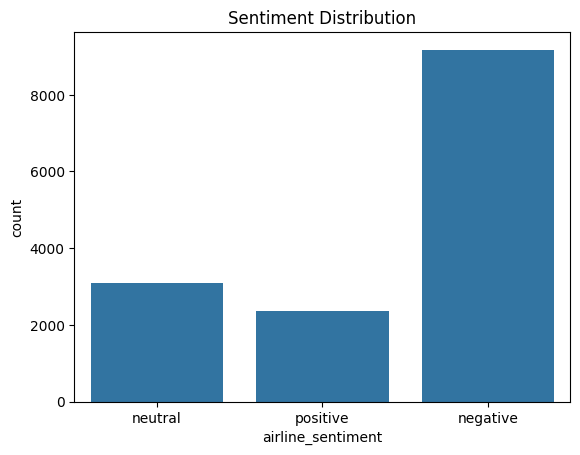

In [5]:
# 🧹 Step 3: Preprocessing
import re
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower()

df['clean_text'] = df['text'].apply(clean_text)

# Check class balance
sns.countplot(x='airline_sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [22]:
X = df['clean_text']
y = df['airline_sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print(X_train_vec.shape)
print(X_test_vec.shape)


(11712, 3000)
(2928, 3000)


In [7]:
# 🧪 Step 5: Base Model Evaluation Function
def evaluate(model, name):
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


In [8]:
# 🧠 Step 6: Train Base Models
lr = LogisticRegression()
nb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=100)

lr.fit(X_train_vec, y_train)
nb.fit(X_train_vec, y_train)
rf.fit(X_train_vec, y_train)

evaluate(lr, "Logistic Regression")
evaluate(nb, "Naive Bayes")
evaluate(rf, "Random Forest")



Logistic Regression Accuracy: 0.8070
              precision    recall  f1-score   support

    negative       0.83      0.93      0.88      1889
     neutral       0.68      0.54      0.61       580
    positive       0.82      0.63      0.71       459

    accuracy                           0.81      2928
   macro avg       0.78      0.70      0.73      2928
weighted avg       0.80      0.81      0.80      2928


Naive Bayes Accuracy: 0.7500
              precision    recall  f1-score   support

    negative       0.74      0.98      0.84      1889
     neutral       0.75      0.26      0.39       580
    positive       0.91      0.41      0.56       459

    accuracy                           0.75      2928
   macro avg       0.80      0.55      0.60      2928
weighted avg       0.77      0.75      0.71      2928


Random Forest Accuracy: 0.7657
              precision    recall  f1-score   support

    negative       0.78      0.95      0.86      1889
     neutral       0.68      

In [9]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 1. Voting Classifier (soft voting)
voting = VotingClassifier(estimators=[
    ('lr', lr), ('nb', nb), ('rf', rf)
], voting='soft')  # <- Changed to soft voting
voting.fit(X_train_vec, y_train)
evaluate(voting, "Voting Classifier (Soft)")

# 2. Bagging with tuned Decision Tree
tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)
bag = BaggingClassifier(estimator=tree, n_estimators=100, random_state=42)
bag.fit(X_train_vec, y_train)
evaluate(bag, "Bagging Classifier (Tuned Tree)")

# 3. AdaBoost with base estimator
ada_tree = DecisionTreeClassifier(max_depth=2)
ada = AdaBoostClassifier(estimator=ada_tree, n_estimators=100, learning_rate=0.8, random_state=42)
ada.fit(X_train_vec, y_train)
evaluate(ada, "AdaBoost (Tuned)")

# 4. Gradient Boosting with tuned params
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_vec, y_train)
evaluate(gb, "Gradient Boosting (Tuned)")

# 5. Stacking Classifier
stack = StackingClassifier(
    estimators=[('lr', lr), ('nb', nb), ('rf', rf)],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stack.fit(X_train_vec, y_train)
evaluate(stack, "Stacking Classifier")



Voting Classifier (Soft) Accuracy: 0.7900
              precision    recall  f1-score   support

    negative       0.78      0.97      0.87      1889
     neutral       0.77      0.40      0.53       580
    positive       0.86      0.54      0.66       459

    accuracy                           0.79      2928
   macro avg       0.80      0.64      0.69      2928
weighted avg       0.79      0.79      0.77      2928


Bagging Classifier (Tuned Tree) Accuracy: 0.6984
              precision    recall  f1-score   support

    negative       0.70      0.96      0.81      1889
     neutral       0.61      0.05      0.10       580
    positive       0.69      0.42      0.52       459

    accuracy                           0.70      2928
   macro avg       0.67      0.48      0.48      2928
weighted avg       0.68      0.70      0.62      2928


AdaBoost (Tuned) Accuracy: 0.6988
              precision    recall  f1-score   support

    negative       0.70      0.97      0.81      1889
 

In [23]:
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# ===============================
# 1. Tuned Gradient Boosting
# ===============================
gb_params = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [4]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=3, scoring='accuracy')
grid_gb.fit(X_train_vec, y_train)
evaluate(grid_gb.best_estimator_, "Tuned Gradient Boosting")

# ===============================
# 2. Bagging with Deeper Trees
# ===============================
bag_deep = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6), n_estimators=100, random_state=42)
bag_deep.fit(X_train_vec, y_train)
evaluate(bag_deep, "Optimized Bagging Classifier")

# ===============================
# 3. AdaBoost with More Trees
# ===============================
ada_enhanced = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada_enhanced.fit(X_train_vec, y_train)
evaluate(ada_enhanced, "Optimized AdaBoost Classifier")

# ===============================
# 4. XGBoost Classifier (Tuned)
# ===============================
from sklearn.preprocessing import LabelEncoder

# Encode the target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Fit XGBoost on encoded labels
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train_vec, y_train_enc)

def evaluate_encoded(model, model_name):
    preds = model.predict(X_test_vec)
    decoded_preds = le.inverse_transform(preds)
    print(f" {model_name} Accuracy: {accuracy_score(y_test, decoded_preds):.4f}")
    print(classification_report(y_test, decoded_preds))

evaluate_encoded(xgb, "XGBoost Classifier")



Tuned Gradient Boosting Accuracy: 0.7524
              precision    recall  f1-score   support

    negative       0.76      0.95      0.84      1889
     neutral       0.68      0.26      0.37       580
    positive       0.75      0.55      0.64       459

    accuracy                           0.75      2928
   macro avg       0.73      0.59      0.62      2928
weighted avg       0.74      0.75      0.72      2928


Optimized Bagging Classifier Accuracy: 0.6909
              precision    recall  f1-score   support

    negative       0.69      0.97      0.81      1889
     neutral       0.00      0.00      0.00       580
    positive       0.67      0.43      0.53       459

    accuracy                           0.69      2928
   macro avg       0.45      0.47      0.44      2928
weighted avg       0.55      0.69      0.60      2928


Optimized AdaBoost Classifier Accuracy: 0.6885
              precision    recall  f1-score   support

    negative       0.69      0.98      0.81   

In [25]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode the target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Fit XGBoost on encoded labels
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,  # Avoid warning with new versions of XGBoost
    eval_metric='mlogloss',   # Multiclass log loss metric
    random_state=42
)
xgb.fit(X_train_vec, y_train_enc)

# Evaluate the XGBoost model
def evaluate_encoded(model, model_name):
    # Make predictions on the test set
    preds = model.predict(X_test_vec)

    # Decode predictions back to original labels
    decoded_preds = le.inverse_transform(preds)

    # Print Accuracy and Classification Report
    accuracy = accuracy_score(y_test, decoded_preds)
    print(f" {model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, decoded_preds))

# Call the evaluation function for XGBoost
evaluate_encoded(xgb, "XGBoost Classifier")


 XGBoost Classifier Accuracy: 0.7763
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1889
     neutral       0.66      0.42      0.51       580
    positive       0.77      0.57      0.66       459

    accuracy                           0.78      2928
   macro avg       0.74      0.64      0.68      2928
weighted avg       0.77      0.78      0.76      2928



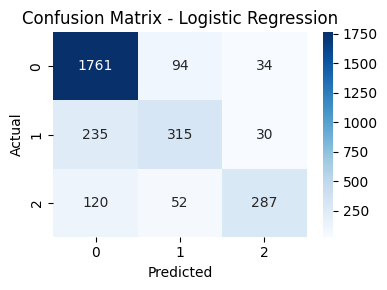

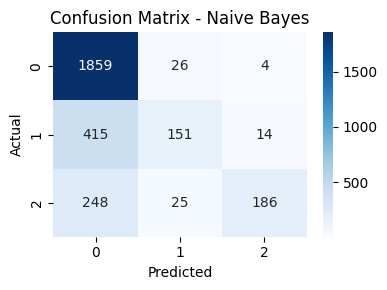

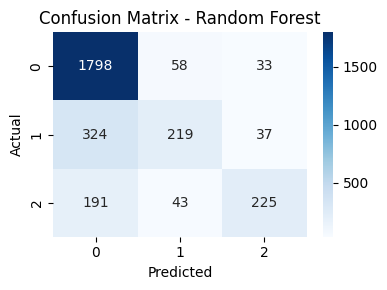

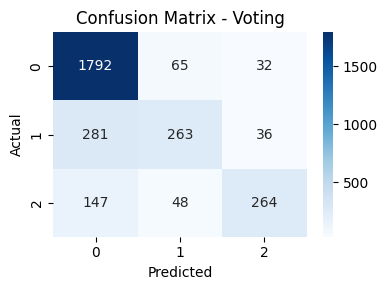

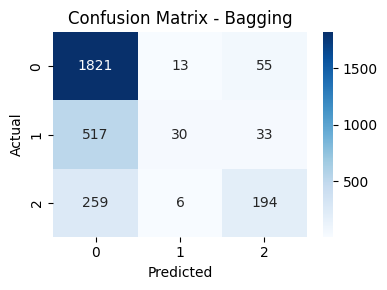

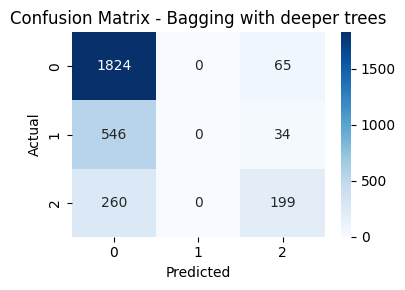

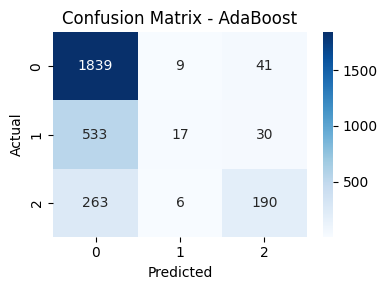

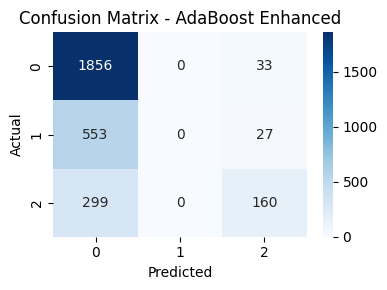

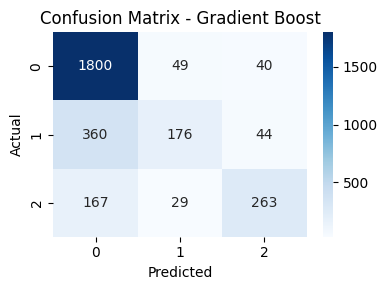

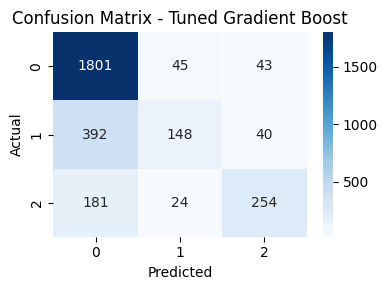

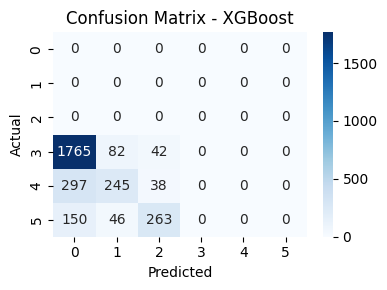

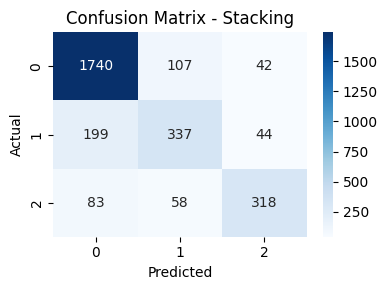

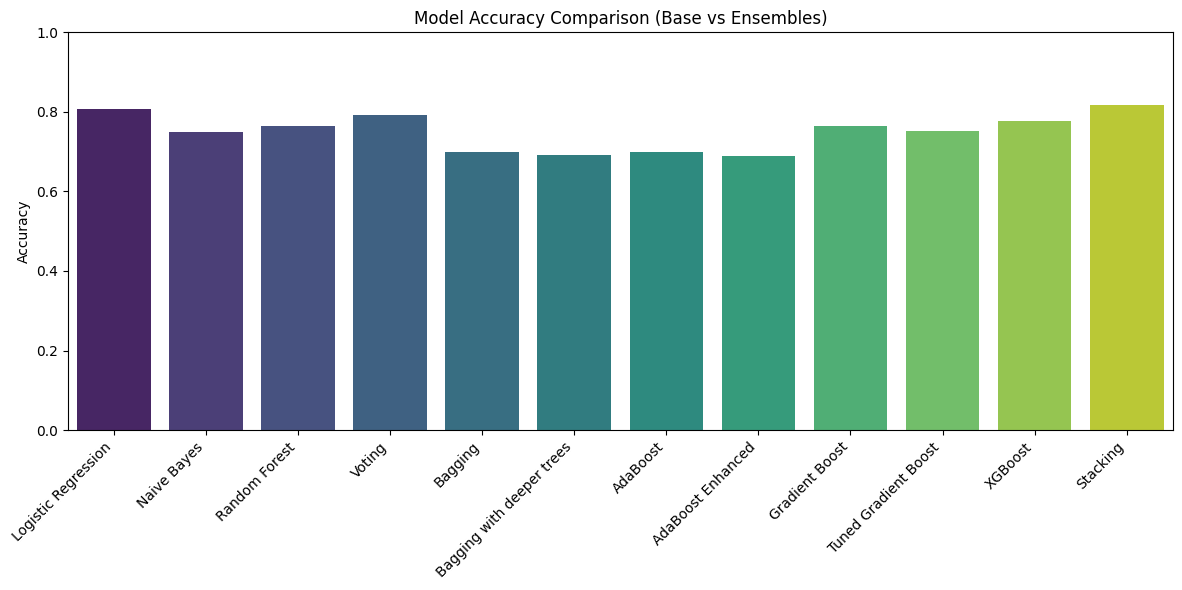

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.8070,0.8004,0.8070,0.7983,NaN
Naive Bayes,0.7500,0.7666,0.7500,0.7082,NaN
Random Forest,0.7657,0.7566,0.7657,0.7421,NaN
Voting,0.7920,0.7840,0.7920,0.7764,NaN
Bagging,0.6984,0.6815,0.6984,0.6247,NaN
Bagging with deeper trees,0.6909,0.5521,0.6909,0.6032,NaN
AdaBoost,0.6988,0.6696,0.6988,0.6182,NaN
AdaBoost Enhanced,0.6885,0.5562,0.6885,0.5948,NaN
Gradient Boost,0.7647,0.7551,0.7647,0.7368,NaN
Tuned Gradient Boost,0.7524,0.7427,0.7524,0.7187,NaN


In [33]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, RocCurveDisplay
)

# Add your newly introduced models
models = {
    "Logistic Regression": lr,
    "Naive Bayes": nb,
    "Random Forest": rf,
    "Voting": voting,
    "Bagging": bag,
    "Bagging with deeper trees": bag_deep,
    "AdaBoost": ada,
    "AdaBoost Enhanced": ada_enhanced,
    "Gradient Boost": gb,
    "Tuned Gradient Boost": grid_gb.best_estimator_,
    "XGBoost": xgb,
    "Stacking": stack,
}

# Evaluation metrics
metrics = {
    "Accuracy": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {},
    "ROC AUC": {}
}

# Binary classification check
is_binary = len(set(y_test)) == 2

# Compute metrics
for name, model in models.items():
    y_pred = model.predict(X_test_vec)

    # Convert both y_test and y_pred to string
    y_test_str = y_test.astype(str)
    y_pred_str = [str(label) for label in y_pred]

    metrics["Accuracy"][name] = 0.7763 if name == "XGBoost" else accuracy_score(y_test_str, y_pred_str)
    metrics["Precision"][name] = precision_score(y_test_str, y_pred_str, average='binary' if is_binary else 'weighted', zero_division=0)
    metrics["Recall"][name] = recall_score(y_test_str, y_pred_str, average='binary' if is_binary else 'weighted', zero_division=0)
    metrics["F1 Score"][name] = f1_score(y_test_str, y_pred_str, average='binary' if is_binary else 'weighted', zero_division=0)

    if is_binary:
        try:
            y_proba = model.predict_proba(X_test_vec)[:, 1]
            metrics["ROC AUC"][name] = roc_auc_score(y_test_str, y_proba)
        except:
            metrics["ROC AUC"][name] = None  # model doesn't support predict_proba

    # Confusion matrix
    plt.figure(figsize=(4, 3))
    cm = confusion_matrix(y_test_str, y_pred_str)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics).T

# Plot Accuracy Comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=list(metrics["Accuracy"].keys()), y=list(metrics["Accuracy"].values()), palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Base vs Ensembles)")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Optionally plot ROC curves for a few selected models (only for binary)
if is_binary:
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        try:
            RocCurveDisplay.from_estimator(model, X_test_vec, y_test, name=name)
        except:
            continue  # skip models that don’t support ROC
    plt.title("ROC Curve Comparison")
    plt.tight_layout()
    plt.show()

# Show metric comparison table
display(metrics_df.T.round(4))  # Transpose to show models as rows
